K Nearest Neighbour <br> <hr>
Problem Statement: <br>
Refer social network Ad Dataset. Apply appropriate EDA methods wherever required and perform feature engineering. Construct a model using KNN classifier. Analyse the performance of model with suitable evaluation measures and generate classification report.<br>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Social_Network_Ads (3).csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


The dataset contains 400 entries which contains the userId, gender, age, estimatedsalary and the purchased history. The matrix of features taken into account are age and estimated salary which are going to predict if the user is going to buy new car or not(1=Yes, 0=No).

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [66]:
df.describe()

,Gender,Age,EstimatedSalary,Purchased
count,380.000000,380.000000,380.000000,380.000000
mean,0.521053,37.586842,70421.052632,0.368421
std,0.500215,10.592492,34604.155483,0.483012
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.000000,43000.000000,0.000000
50%,1.000000,37.000000,70500.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


changing Gender column Female to 1 and Male to 0

In [5]:
df['Gender'] = df['Gender'].map({'Female':1, 'Male':0})

Droping User ID column

In [6]:
df = df.drop(['User ID'], axis = 1)

In [7]:
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [8]:
df.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

No NAN values in data set

In [9]:
df.duplicated().sum()

20

here we are having 20 duplicate values in data set 
now droping that duplicate values from dataset

In [10]:
df = df.drop_duplicates()
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


<AxesSubplot:>

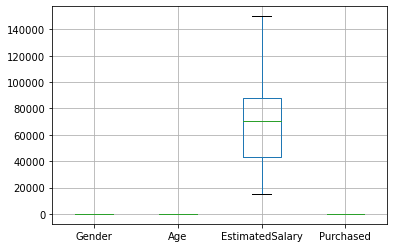

In [67]:
df.boxplot()

In [73]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [76]:
outliers = find_outliers_IQR(df['EstimatedSalary'])

print("number of outliers:" + str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

outliers

number of outliers:0
max outlier value: nan
min outlier value: nan


Series([], Name: EstimatedSalary, dtype: int64)

kNN is sensitive to outlier and imbalnaced data .here we check so there is no outlier in given dataset


In [11]:
X = df.drop(['Purchased'], axis = 1)
Y = df['Purchased'] 

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [60]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=9)

In [61]:
Y_pred = knn.predict(X_test)

In [62]:
print(confusion_matrix(Y_test, Y_pred))

[[39  9]
 [ 0 28]]


In [63]:
print(accuracy_score(Y_test, Y_pred) * 100)

88.1578947368421


The accuracy is 88.0 of this model

In [34]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        48
           1       0.80      1.00      0.89        28

    accuracy                           0.91        76
   macro avg       0.90      0.93      0.91        76
weighted avg       0.93      0.91      0.91        76



so we get accuracy is 88% so our model is good